<a href="https://colab.research.google.com/github/victordattoli/data_science/blob/main/analise_dados_roma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise dos Dados do Airbnb - ****Roma (Itália)****

A todo tempo vemos pessoas inovando e trazendo novas soluções, que mudam as formas de se fazer negócios. Dentre essas organizações novas e disruptivas, é muito provável que você já tenha ouvido falar do [Airbnb](https://www.airbnb.com.br/), seja por própria utilização ou de algum conhecido. De maneira curiosa, a empresa hoje é a **maior do ramo de hotelaria** sem sequer possuir um hotel.

Através da sua plataforma, o Airbnb consegue apresentar inúmeras soluções de hospedagens sem a necessidade de construir arranjos físicos, apenas conectando locadores e locatários, assegurando ambas as partes no cumprimento do acordo estabelecido.

Os números realmente são impressionantes. Em comunicado ao final de 2021, a empresa divulgou que possui em seu quadro **mais de 4 milhões de anfitriões** e que durante seus 14 anos de existência, já tiveram **mais de 1 bilhão de hospedagens**.

Relacionado a tais informações, o Airbnb acaba por disponibilizar uma série de dados sobre hospedagens nas suas cidades de impacto ao redor do mundo. O acesso para a base é através do Portal  [Inside Airbnb](http://insideairbnb.com/get-the-data.html), podendo assim entender comportamentos e realizar análises acerca de tudo ali disposto.

<left><img width="10%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Airbnb_Logo_B%C3%A9lo.svg/2560px-Airbnb_Logo_B%C3%A9lo.svg.png"></center>
****

**Por vontade em ainda conhecer a capital da Itália, o notebook trará uma análise acerca das hospedagens dispostas na plataforma do Airbnb, bem como gerar insights sobre os mesmos** 

### Obtenção dos Dados

Como mencionado anteriormente, o Portal Inside Airbnb será utilizado como fonte para obtenção dos dados. Como análise explanatória inicial e simplificada, buscamos o seguinte arquivo da cidade de Roma.
* `listing.csv` - *Summary information and metrics for listings in Rome (good for visualisations).*

In [2]:
# importar os pacotes necessarios
# pacote pandas para análises estatísticas 
import pandas as pd
# pacotes para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/italy/lazio/rome/2022-06-07/visualisations/listings.csv')

### Análise dos Dados

Para que possamos entender claramente os dados e o que significam, o dicionário das variáveis abaixo permite uma melhor visualização e entendimento no caso de dúvidas.

**Dicionário das variáveis**

* `id` - número destinado a identificação do imóvel.
* `name` - nome dado ao imóvel anunciado.
* `host_id` - número destinado a identificação do proprietário.
* `host_name` - nome do proprietário.
* `neighbourhood_group` - região do imóvel.
* `neighbourdhood` - bairro do imóvel.
* `latitude` - coordenada de latitude do imóvel.
* `longitude` - coordenada de longitude do imóvel.
* `room_type` - tipo de imóvel.
* `price` - preço de hospedagem diária no imóvel.
* `minimum_nights` - número mínimo de hospedagens.
* `number_of_reviews` - número de avaliações feitas no imóvel.
* `last_review` - data da última avaliação.
* `reviews_per_month` - número de revisões por mês.
* `calculated_host_listening_count` - número de imóveis do mesmo anfitrião.
* `availability_365` - número de dias disponíveis para o imóvel dentro de 365 dias.
* `number_of_reviews_ltm` - número de avaliações nos últimos doze meses.
* `license` - número de license da acomodação.

Com isso, é possível identificar o cabeçalho da base, buscando os primeiros cinco registros.

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,49955080,Singola al Casale di Gardenia,396326393,Alessia,NaN,XV Cassia/Flaminia,42.07605,12.32067,Private room,66,1,0,NaN,NaN,3,88,0,NaN
1,41146116,Il Giardino di Veio,322089651,Rosetta,NaN,XV Cassia/Flaminia,42.05088,12.45619,Private room,20,2,1,2020-01-26,0.03,1,0,0,NaN
2,39624404,CAMERA MATRIMONIALE STANDARD CON COLAZIONE INC...,304471512,Hotel,NaN,VI Roma delle Torri,41.82882,12.73900,Private room,100,1,0,NaN,NaN,1,180,0,NaN
3,1903817,Lovely apartment with fabulous view north of Rome,9883614,Eva,NaN,XV Cassia/Flaminia,42.13578,12.32621,Entire home/apt,110,3,53,2022-05-25,0.63,4,289,3,NaN
4,17617868,SUPER OFFERTA-stanza Maria-doppia o matrimoniale,97622372,Eleonora,NaN,XV Cassia/Flaminia,42.06512,12.46106,Private room,25,1,12,2022-05-17,0.19,3,315,3,16903


#### **1. Identificação do conjunto de dados.**
Nesta etapa é possível identificar as variáveis, seus tipos e também analises quantitativas acerca delas.

In [5]:
# identificar o volume de dados do DataFrame
print('Entradas:' , df.shape[0]) #identificar o número de linhas
print('Variáveis:', df.shape[1],'\n') #identificar o número de colunas e pular uma linha

# identificar o tipo das variáveis do dataset 'df'
display(df.dtypes)

Entradas: 23911
Variáveis: 18 



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

#### **2. Identificação de valores ausentes**
Para se realizar uma análise, é imprescíndivel que o dataset tenha confiabilidade nos dados e que os mesmos estejam preenchidos. 

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.852620
reviews_per_month                 0.164820
last_review                       0.164820
host_name                         0.000209
name                              0.000125
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

Como já foi previsto anteriormente - no cabeçalho, a coluna `neightbourdhood_group` está vazia, portanto temos um total de 100% de valores ausentes. Não menos importante, temos também como ressalva:
* `license` com 85% de valores ausentes.
* `reviews_per_month` com quase 20% de valores ausentes.
* `last_review` com quase 20% de valores ausentes.
* `host_name` e `name` com menos de 1% de valores ausentes.

Com a identificação das variáveis é valido definir a variável `id` como de fato o id do dataset, visto que estamos analisando os imóveis e este os representa.

**Portanto, faremos a alteração necessária**

In [7]:
# definir a variável 'id' como id do dataset
df.set_index('id', inplace = True)

In [8]:
# novamente mostrar o cabeçalho do conjunto de dados
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
49955080,Singola al Casale di Gardenia,396326393,Alessia,NaN,XV Cassia/Flaminia,42.07605,12.32067,Private room,66,1,0,NaN,NaN,3,88,0,NaN
41146116,Il Giardino di Veio,322089651,Rosetta,NaN,XV Cassia/Flaminia,42.05088,12.45619,Private room,20,2,1,2020-01-26,0.03,1,0,0,NaN
39624404,CAMERA MATRIMONIALE STANDARD CON COLAZIONE INC...,304471512,Hotel,NaN,VI Roma delle Torri,41.82882,12.73900,Private room,100,1,0,NaN,NaN,1,180,0,NaN
1903817,Lovely apartment with fabulous view north of Rome,9883614,Eva,NaN,XV Cassia/Flaminia,42.13578,12.32621,Entire home/apt,110,3,53,2022-05-25,0.63,4,289,3,NaN
17617868,SUPER OFFERTA-stanza Maria-doppia o matrimoniale,97622372,Eleonora,NaN,XV Cassia/Flaminia,42.06512,12.46106,Private room,25,1,12,2022-05-17,0.19,3,315,3,16903


#### **3. Identificação dos tipos de distribuição entre variáveis** 
Identificadas as variáveis de maior interesse, bem como de fato númericas, vamos plotar o histograma para identificação das distribuições.

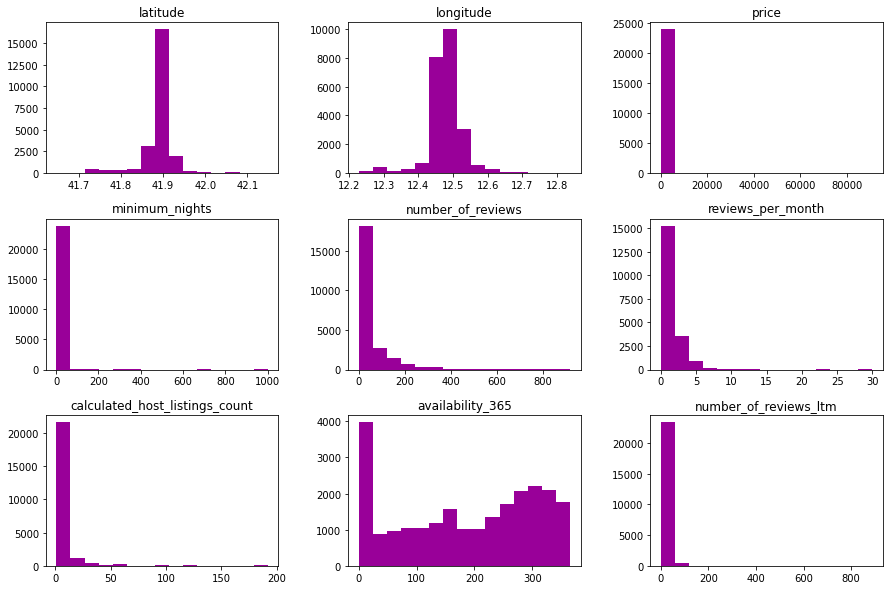

In [9]:
# plotar o histograma das variáveis numéricas
df.hist(column=['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm'],
        bins=15, grid=False, figsize = (15,10),color='#990099');

Com a visualização do histograma, já é possível identificar que algumas variáveis possuem *outliers* e, por isso, devemos tratá-los.
Variáveis: `price`, `minimum_nights`, `calculated_host_listings_count` e `number_of_reviews_ltm`.

Para identificar a presença realmente dos *outliers*, podemos utilizar a função `describe()` e também plotar os `bloxsplots` das variáveis.

In [10]:
# resumo estatistico, com as informações dos bloxspots
df[['price','minimum_nights','calculated_host_listings_count','number_of_reviews_ltm']].describe()

,price,minimum_nights,calculated_host_listings_count,number_of_reviews_ltm
count,23911.000000,23911.000000,23911.000000,23911.000000
mean,166.658107,3.650454,7.728870,9.830413
std,846.356788,19.262245,21.466139,16.881751
min,0.000000,1.000000,1.000000,0.000000
25%,65.000000,1.000000,1.000000,0.000000
50%,100.000000,2.000000,3.000000,2.000000
75%,157.000000,3.000000,6.000000,13.000000
max,90963.000000,1000.000000,192.000000,889.000000


As informações acima permitem uma limpeza dos dados, utilizando a técnica de limites, sendo:

`limite inferior = 1ºQ - 1,5*(3ºQ - 1ºQ)`

`limite superior = 3ºQ + 1,5*(3ºQ - 1ºQ)`

In [11]:
## definindo os limites da variável price
limite_inferior_price = df['price'].quantile(0.25) - 1.5*(df['price'].quantile(0.75)-df['price'].quantile(0.25))
limite_superior_price = df['price'].quantile(0.75) + 1.5*(df['price'].quantile(0.75)-df['price'].quantile(0.25))

## definindo os limites da variável minimum_nights
limite_inferior_minimum_nights = df['minimum_nights'].quantile(0.25) - 1.5*(df['minimum_nights'].quantile(0.75)-df['minimum_nights'].quantile(0.25))
limite_superior_minimum_nights = df['minimum_nights'].quantile(0.75) + 1.5*(df['minimum_nights'].quantile(0.75)-df['minimum_nights'].quantile(0.25))

## definindo os limites da variável calculated_host_listings_count
limite_inferior_calculated_host_listings_count = df['calculated_host_listings_count'].quantile(0.25) - 1.5*(df['calculated_host_listings_count'].quantile(0.75)-df['calculated_host_listings_count'].quantile(0.25))
limite_superior_calculated_host_listings_count = df['calculated_host_listings_count'].quantile(0.75) + 1.5*(df['calculated_host_listings_count'].quantile(0.75)-df['calculated_host_listings_count'].quantile(0.25))

## definindo os limites da variável number_of_reviews_ltm
limite_inferior_number_of_reviews_ltm = df['number_of_reviews_ltm'].quantile(0.25) - 1.5*(df['number_of_reviews_ltm'].quantile(0.75)-df['number_of_reviews_ltm'].quantile(0.25))
limite_superior_number_of_reviews_ltm = df['number_of_reviews_ltm'].quantile(0.75) + 1.5*(df['number_of_reviews_ltm'].quantile(0.75)-df['number_of_reviews_ltm'].quantile(0.25))

Agora, com os limites calculados, é possível realizar a cópia do dataframe com os dados sem presença de *outliers* e plotar os histogramas novamente.

In [12]:
## realizar copia do dataframe
df_clean = df.copy()

## limpar outliers da variável price
df_clean.drop(df_clean[df_clean['price'] < limite_inferior_price].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean['price'] > limite_superior_price].index, axis=0, inplace=True)

## limpar outliers da variável minimun_nights
df_clean.drop(df_clean[df_clean['minimum_nights'] < limite_inferior_minimum_nights].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean['minimum_nights'] > limite_superior_minimum_nights].index, axis=0, inplace=True)

## limpar outliers da variável calculated_host_listings_count
df_clean.drop(df_clean[df_clean['calculated_host_listings_count'] < limite_inferior_calculated_host_listings_count].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean['calculated_host_listings_count'] > limite_superior_calculated_host_listings_count].index, axis=0, inplace=True)

## limpar outliers da variável number_of_reviews_ltm
df_clean.drop(df_clean[df_clean['number_of_reviews_ltm'] < limite_inferior_number_of_reviews_ltm].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean['number_of_reviews_ltm'] > limite_superior_number_of_reviews_ltm].index, axis=0, inplace=True)


Em virtude das variáveis `neighbourhood_group` e `license` estarem com quase a totalidade dos dados faltantes, também será excluida esse coluna para limpeza do dataframe.

In [13]:
## remover variáveis
df_clean.drop('neighbourhood_group', axis=1, inplace=True)
df_clean.drop('license', axis=1, inplace=True)

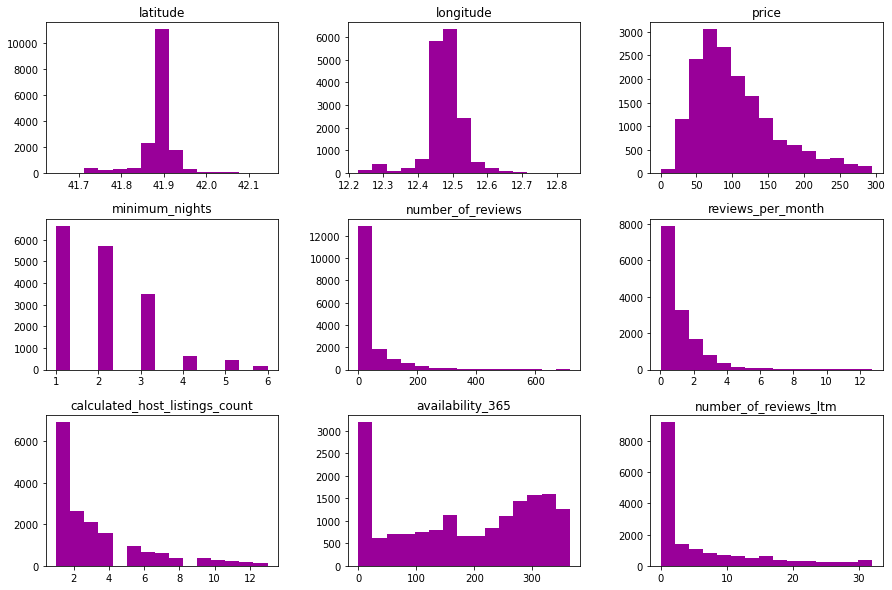

In [14]:
## plotar novamente o histograma
df_clean.hist(column=['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm'],
        bins=15, grid=False, figsize = (15,10),color='#990099');

Como o preço é uma das variáveis mais importantes nessa análise, é interessante compreender a disposição dessa variável, além da visualização do histograma.

In [15]:
## descrever a variável price
df_clean['price'].describe()

count    17043.000000
mean       103.369888
std         56.803352
min          0.000000
25%         60.000000
50%         90.000000
75%        131.000000
max        295.000000
Name: price, dtype: float64

#### **4. Identificação dos graus de correlação**
Para identificar o quão relacionadas estão as variáveis, é possível determinar a matriz de correlação e entender a intensidade que duas variáveis possuem.

In [16]:
# criar uma matriz de correlação com as variáveis de interesse
correlacao = df_clean[['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']].corr()
display(correlacao)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
latitude,1.000000,0.272617,0.110306,0.000920,0.024457,0.029701,0.055988,0.014839,0.029347
longitude,0.272617,1.000000,-0.074237,-0.001220,0.023795,0.011783,0.005913,-0.031519,0.006962
price,0.110306,-0.074237,1.000000,-0.016396,-0.051243,0.032751,0.232532,0.205875,0.056349
minimum_nights,0.000920,-0.001220,-0.016396,1.000000,0.101051,-0.014486,-0.164694,-0.080004,0.053134
number_of_reviews,0.024457,0.023795,-0.051243,0.101051,1.000000,0.454625,-0.036012,-0.018097,0.425255
reviews_per_month,0.029701,0.011783,0.032751,-0.014486,0.454625,1.000000,-0.004558,0.100068,0.506757
calculated_host_listings_count,0.055988,0.005913,0.232532,-0.164694,-0.036012,-0.004558,1.000000,0.132996,0.021923
availability_365,0.014839,-0.031519,0.205875,-0.080004,-0.018097,0.100068,0.132996,1.000000,0.143912
number_of_reviews_ltm,0.029347,0.006962,0.056349,0.053134,0.425255,0.506757,0.021923,0.143912,1.000000


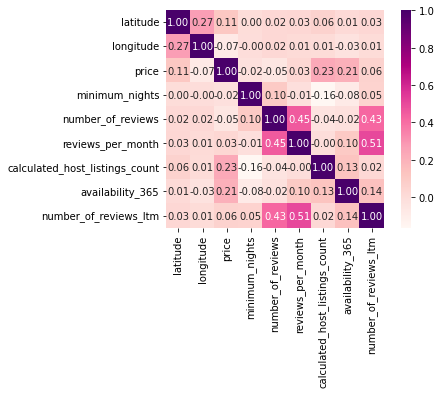

In [17]:
# plotar um heatmap a partir das correlações
sns.heatmap(correlacao, cmap = 'RdPu', fmt='.2f', square= True, linecolor='white', annot = True);

Através da matriz de correlação, não é possível tirar conclusões assertivas sobre a relação das variáveis, pois os valores tem baixa representatividade direta.

#### **5. Identificação dos imóveis mais alugados**

In [18]:
# apresentar novamente o cabeçalho do df_clean
df_clean.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,,,,,,,,,,,,,,,
49955080,Singola al Casale di Gardenia,396326393,Alessia,XV Cassia/Flaminia,42.07605,12.32067,Private room,66,1,0,NaN,NaN,3,88,0
41146116,Il Giardino di Veio,322089651,Rosetta,XV Cassia/Flaminia,42.05088,12.45619,Private room,20,2,1,2020-01-26,0.03,1,0,0
39624404,CAMERA MATRIMONIALE STANDARD CON COLAZIONE INC...,304471512,Hotel,VI Roma delle Torri,41.82882,12.73900,Private room,100,1,0,NaN,NaN,1,180,0
1903817,Lovely apartment with fabulous view north of Rome,9883614,Eva,XV Cassia/Flaminia,42.13578,12.32621,Entire home/apt,110,3,53,2022-05-25,0.63,4,289,3
17617868,SUPER OFFERTA-stanza Maria-doppia o matrimoniale,97622372,Eleonora,XV Cassia/Flaminia,42.06512,12.46106,Private room,25,1,12,2022-05-17,0.19,3,315,3


A variável `room_type` permite analisar quais são os tipos de imóveis mais alugados na plataforma.

In [19]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean['room_type'].value_counts()

Entire home/apt    10699
Private room        5674
Hotel room           589
Shared room           81
Name: room_type, dtype: int64

Dessa forma, em Roma a maioria escolhe imóveis inteiros para locação, seguido por quartos privados, quartos de hotél e quartos compartilhados, nos percentuais dispostos:

In [20]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean['room_type'].value_counts() / df_clean.shape[0]

Entire home/apt    0.627765
Private room       0.332923
Hotel room         0.034560
Shared room        0.004753
Name: room_type, dtype: float64

Entendido a composição dos imóveis, podemos analisar o valor médio de cada hospedagem. É importante para ver se os imóveis mais disponíveis correspondem aos mais acessíveis e vice-versa.

Para isso, utilizaremos o `boxplot` para ter uma análise com melhor visualização em termos de máximo, mínimo e a dispersão da amostra.

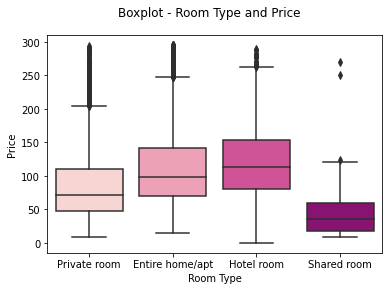

In [21]:
sns.boxplot(x= df_clean['room_type'], y= df_clean['price'], palette ='RdPu')
plt.suptitle('Boxplot - Room Type and Price')
plt.xlabel('Room Type', fontsize = 10)
plt.ylabel('Price',fontsize = 10)

plt.show()

#### **6. Identificação das localidades mais caras**


Não deixando os preços de lado, é importante analisar também os valores de cada localidade.

Para isso, precisamos atribuir a variável `neighbourhood` juntamente a variavel `price`. Pode-se realizar essa atividade com a funão `groupby()`.

In [22]:
# ver preços por bairros, na média e classificar em ordem posteriormente.
df_clean.groupby(['neighbourhood']).price.mean().round(2).sort_values(ascending=False)

neighbourhood
I Centro Storico              126.30
XIII Aurelia                   98.40
II Parioli/Nomentano           90.96
XV Cassia/Flaminia             87.96
XII Monte Verde                87.46
X Ostia/Acilia                 82.98
IX Eur                         80.32
XIV Monte Mario                80.00
VII San Giovanni/Cinecittà     78.13
VIII Appia Antica              76.51
XI Arvalia/Portuense           72.31
IV Tiburtina                   69.92
III Monte Sacro                67.44
VI Roma delle Torri            65.97
V Prenestino/Centocelle        59.80
Name: price, dtype: float64

In [23]:
# ver a quantidade de imóveis disponíveis em cada uma dessas localidades
df_clean['neighbourhood'].value_counts()/df_clean.shape[0]

I Centro Storico              0.487884
VII San Giovanni/Cinecittà    0.083671
II Parioli/Nomentano          0.068826
XIII Aurelia                  0.064719
XII Monte Verde               0.051869
X Ostia/Acilia                0.041425
V Prenestino/Centocelle       0.041366
VIII Appia Antica             0.029631
XV Cassia/Flaminia            0.022238
XIV Monte Mario               0.021827
XI Arvalia/Portuense          0.020008
III Monte Sacro               0.019480
IV Tiburtina                  0.018717
IX Eur                        0.015842
VI Roma delle Torri           0.012498
Name: neighbourhood, dtype: float64

Dessa forma, podemos perceber que não há nenhum bairro com pouquissimos imóveis disponíveis, que poderia favorecer uma análise precipitada.
Uma forma interessante também de entender a disposição dos imóveis, é gerar o gráfico pela latitude e longitude de cada um.

In [25]:
# plotar os imóveis pela latitude-longitude
import plotly.express as px

fig = px.scatter_mapbox(df_clean, lat = "latitude", lon = "longitude", hover_name = "name", color = 'price',
                        zoom=11.5, width=800, height=600)

fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Percebe-se, desse modo, que há uma grande concentração dos imóveis ao longo do centro da cidade e que os valores são maiores na região.

### Conclusões


Embora seja uma análise simplista, é possível compreender a dinâmica dos imóveis na cidade de Roma. 

É fato que a cidade, até pelo seu aspecto turístico, possui a maioria dos imóveis disponíveis para locação próximos do centro e que estes, por uma localização privilegiada, possuem preços naturalmente maiores. É interessante apontar que o bairro `I Centro Storico` é o mais caro e o mais procurado.


Além disso, percebe-se que é uma cidade com a maioria das hospedagens tradicionais, sendo essas `imóveis inteiros` e `quartos individuais`. Sobre o preço desses, temos uma dispersão parecida de preços, mas os quartos de hotéis seguem tendo valores acima até dos imóveis inteiros, que vem em seguida dos quartos individuais e, por último, quartos compartilhados.

Possivelmente os imóveis inteiros são os mais escolhidos por essa relação de custo x benefício, por ser mais abrangente ao número de pessoas e flexível do que hóteis, por exemplo.